<a href="https://colab.research.google.com/github/mohan844/bike_sharing_demand_prediction/blob/main/Capstone_Project_Seoulbike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: Bike sharing Demand prediction** 

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member -** LALIT MOHAN

# **Project Summary -**

In this project of Bike sharing demand prediction our intension is to predict the bike count when there is maximum demand or to reduce waiting time.
It is a project of supervised learning because we have to pridict  bike counts required at each hour.
We will use Linear Regression approach our dependent variable is continious variable. Lasso and ridge are used for better generalization. cross validation technique is used because our dataset is small for better generalization by  predicting the best alpha value. 

Firstly we use EDA to filter the factors(Independent Variable) responsible for the bike counts(Dependent variable) & delete the outliers. In this data set we extract more inferences from date column like month, week and see the varion of bike counts overs these. Temperature, office hours, humidity etc also play important role in counts. so we filter out the important factors. In this EDA we have used 50 graphs.

Secoundly we do some hypothesis testing over population or data by conducting some statistical tests on a sample.

Thirdly we deal with categorical data by one hot encoding or dummy variables called Feature Engineering.

Fourth we filter the independent variable and do scaling. After that we split the data in training and test set

Fifth we apply linear, Lasso and ridge via Cross validation meathod and compare by Regression Evaluation Metrics and come up with more accurate modle.

# **GitHub Link -**

# **Problem Statement**






Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important that the rental bike avilable and accesssible to the public at the right time as its lessens the waiting time. Eventually, providing the city with the stable supply for rental bikes become a major concern. The crucial part is prediction the bike count required at each hour for stable supply of rental bikes.

In [1]:
# Importing the libarary:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Machine Learning/Supervised ML - Regression Capstone Project/SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Dataset doesn't contain any NULL values

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **EDA**

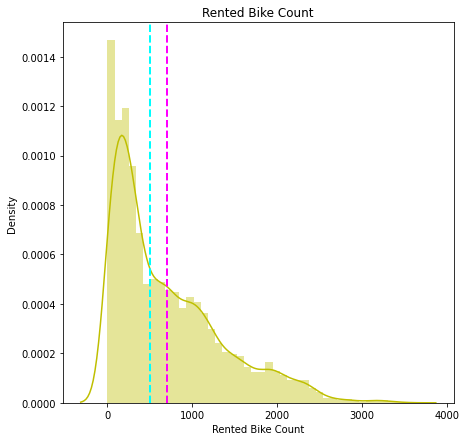

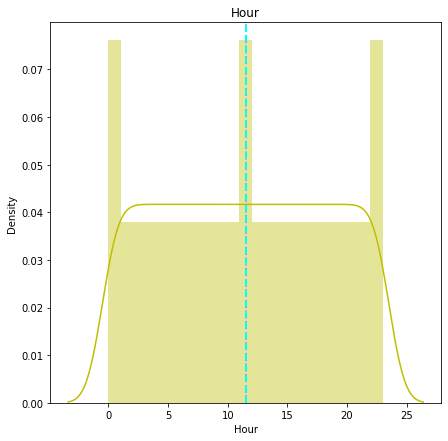

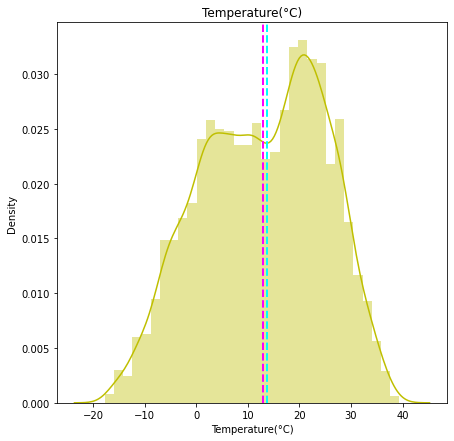

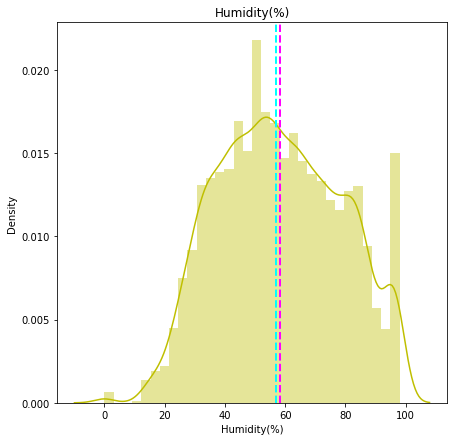

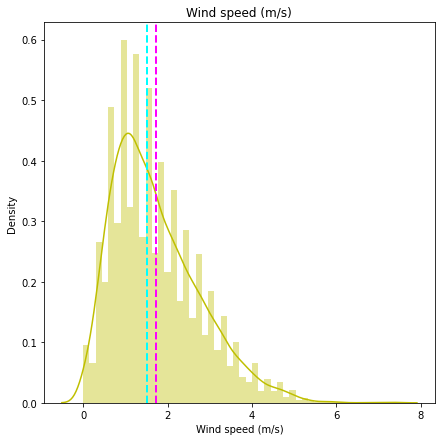

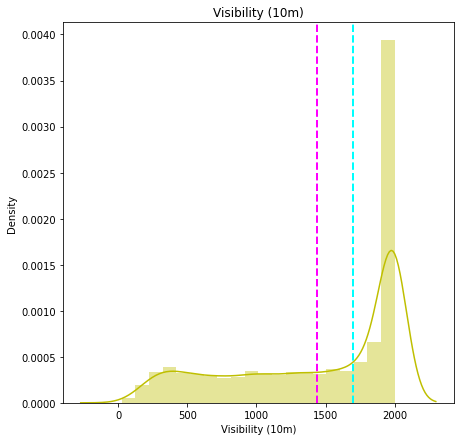

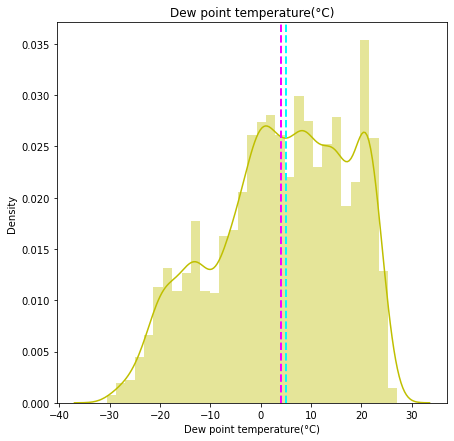

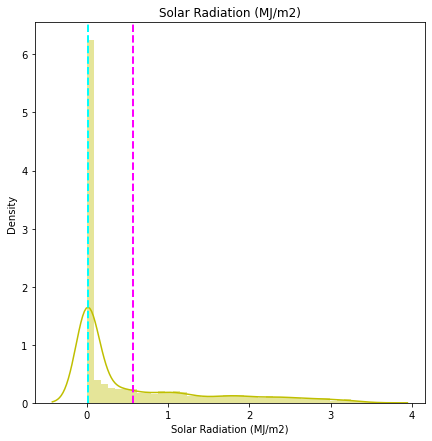

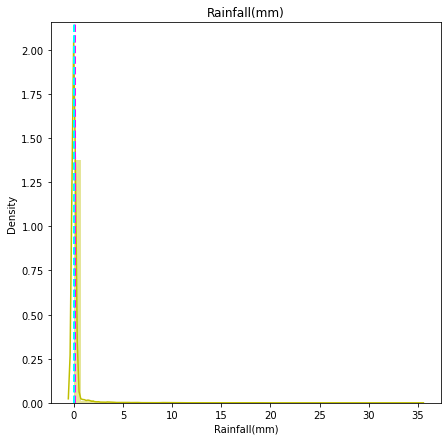

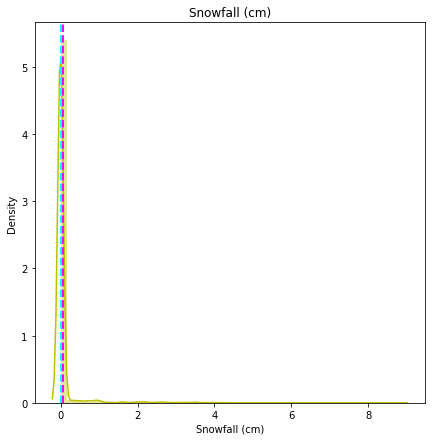

In [7]:
for col in df.describe().columns:
  plt.figure(figsize=(7,7))
  sns.distplot(df[col],color='y')
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col)





---


1. Rented bike count is our dependent variable, and is Positively Skewed.
2. Independent variables like Snowfall, rainfall is Highly Positively Skewed.
3. We will using np.sqrt() Transformation for dependent variable.
4. We will consider hours as categorial column cuz it has descrete values i.e 0-23



---














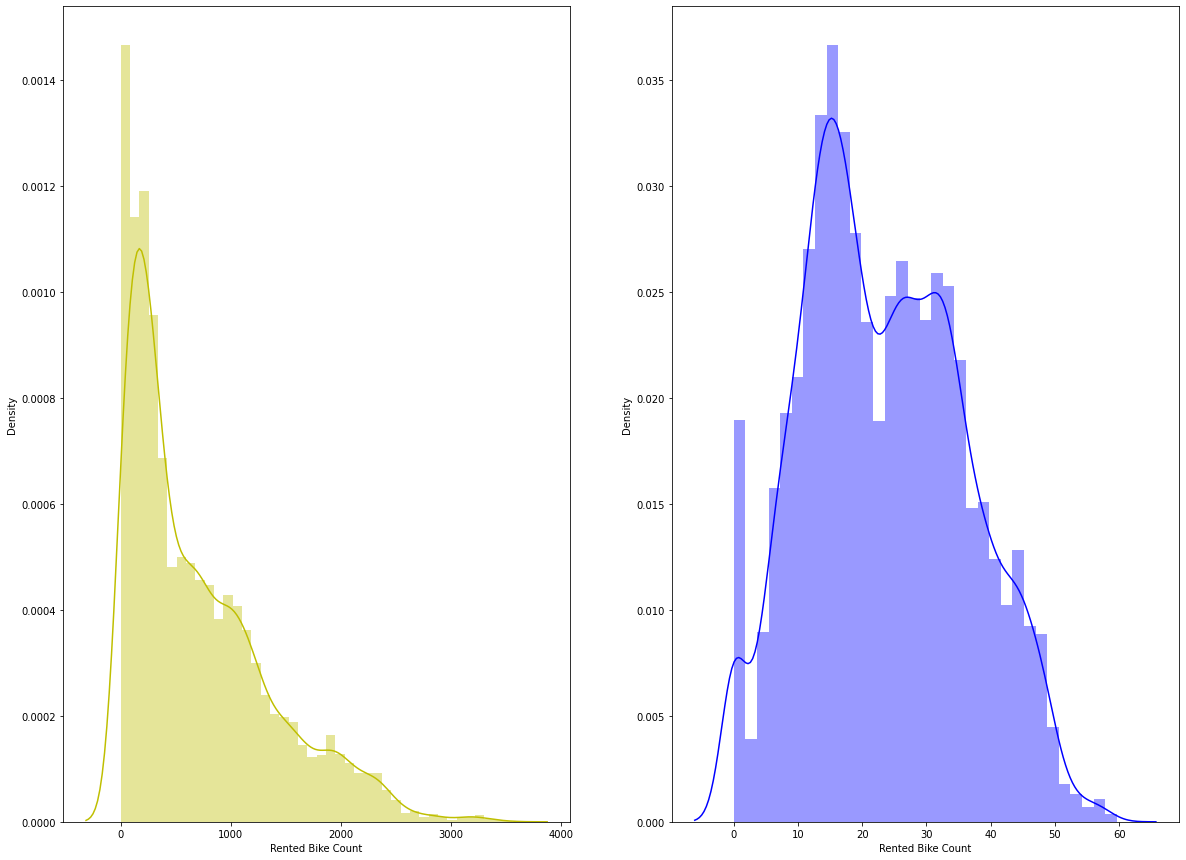

In [8]:
# Using square root meathod for better visualization for Dependent Variable:
fig,axis = plt.subplots(1,2,figsize=(20,15))
sns.distplot(np.sqrt(df['Rented Bike Count']),color='b',ax=axis[1])
sns.distplot(df['Rented Bike Count'],color='y',ax=axis[0])

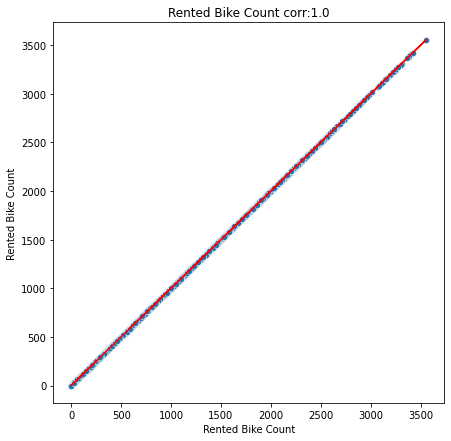

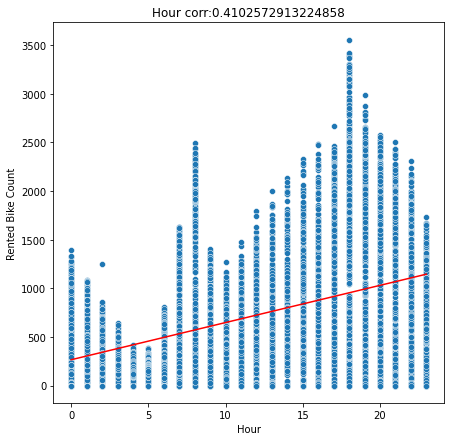

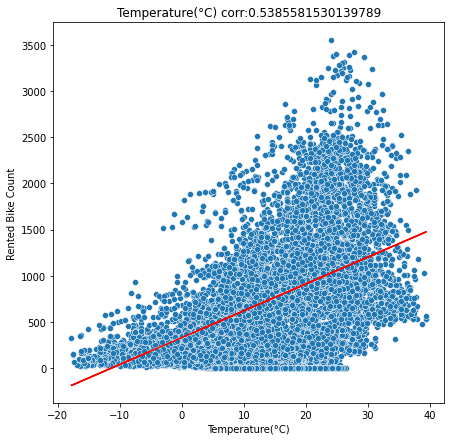

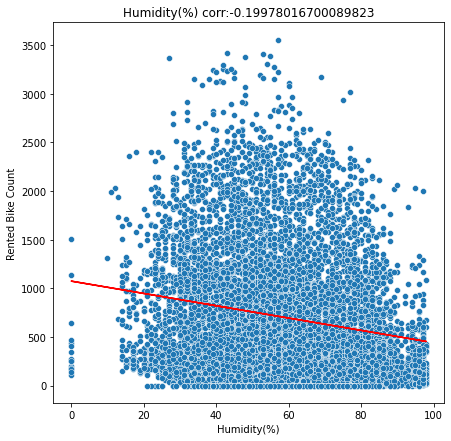

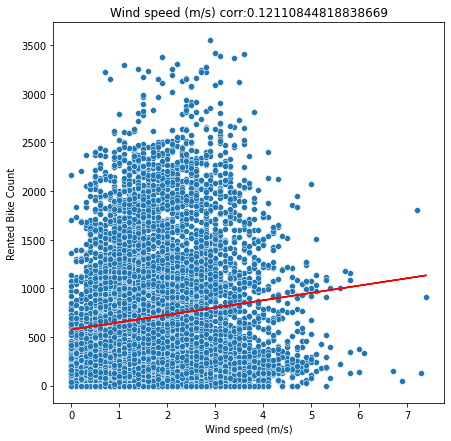

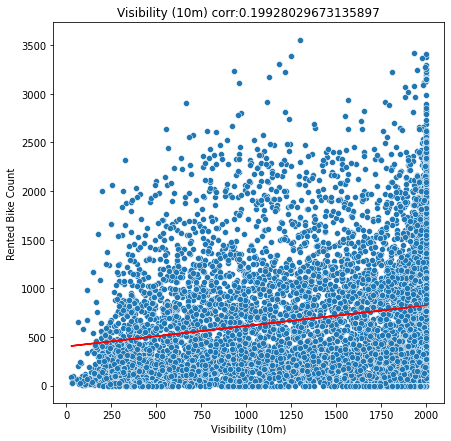

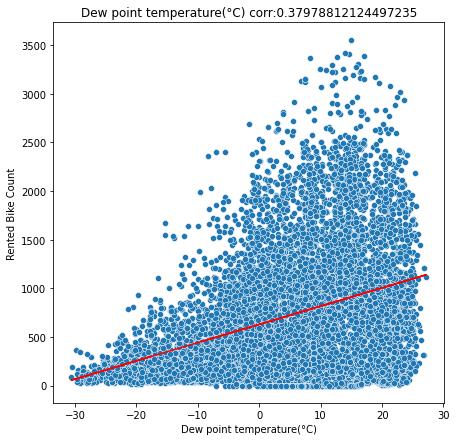

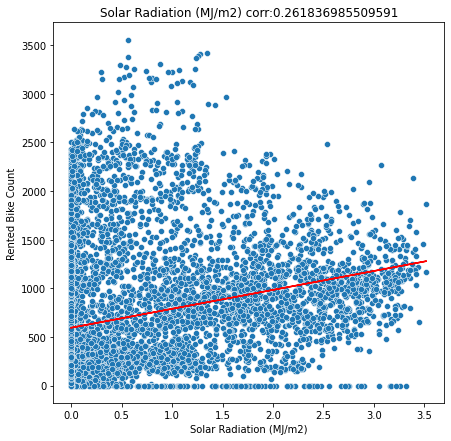

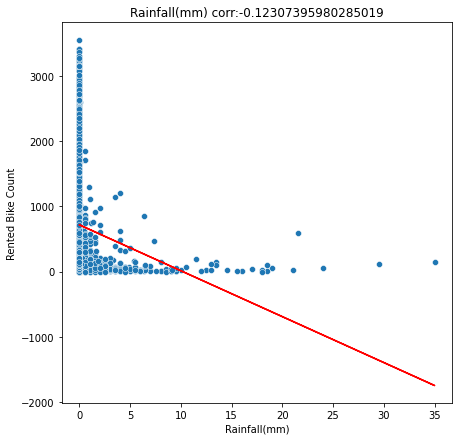

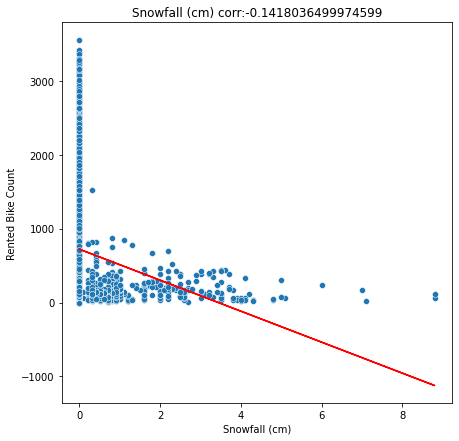

In [9]:
# Scatter Plot Dependent VS Independent Variable:
for col in df.describe().columns:
  plt.figure(figsize=(7,7))
  label = df['Rented Bike Count']
  a = df[col]
  sns.scatterplot(data=df, x=col, y="Rented Bike Count")
  correlation = a.corr(label)
  plt.title(f'{col} corr:{correlation}')
  z=np.polyfit(df[col],df['Rented Bike Count'],1)
  z1=np.poly1d(z)
  zhat=z1(df[col])
  plt.plot(df[col],zhat,color='red')



---
We will skip the **Snowfall, rainfall** variable in feature Engineering, cuz they are highly skewed and have less correlation with y and have outliers too.


---





# **CLEAN UP**

---
Keep the data where **Rented Bike Counted** less than 3000 and **Wind Speed** less than 5 m/s.

In [10]:
## Setting Boundary condition for dependent variable
df =df.drop(df.index[df['Rented Bike Count'] > 3000])

In [11]:
## Setting Boundary condition for wind Speed
df =df.drop(df.index[df['Wind speed (m/s)'] > 5])

##Exploring Categorical columns:

Text(0, 0.5, 'Average Bike Count')

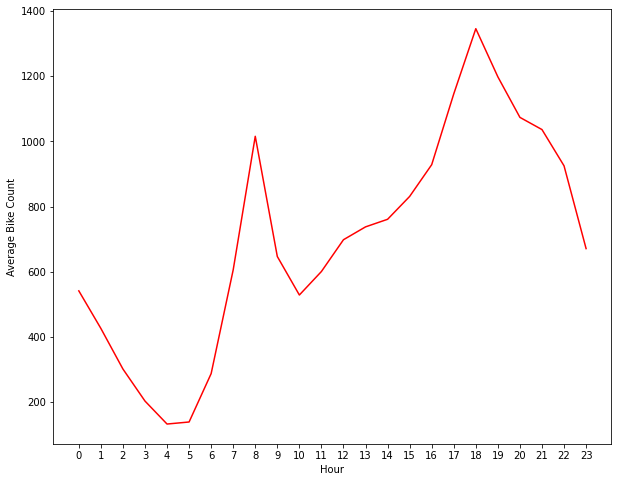

In [12]:
## Hours VS Bikes Counts
df.groupby(['Hour'])['Rented Bike Count'].mean().plot(figsize=(10,8),xticks=np.arange(0,24),color='red')
plt.ylabel('Average Bike Count')

During the day it Seems like  at office hours 8AM and 6 PM have maximum bike 
counts, it increases after 5am and drops after 8 pm

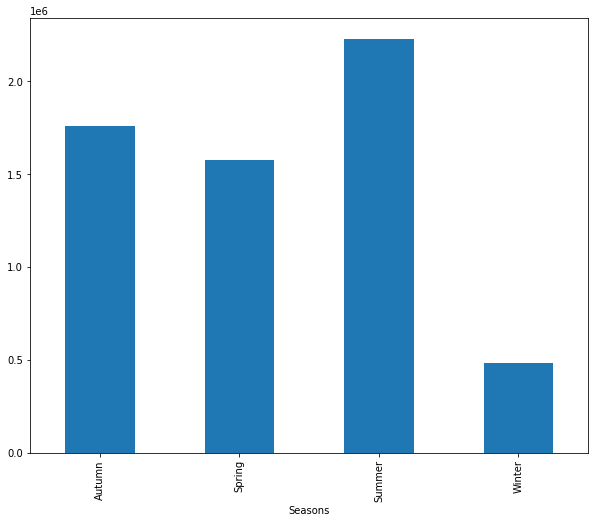

In [13]:
# Seasons VS Bike counts:
df.groupby(['Seasons'])['Rented Bike Count'].sum().plot(kind='bar',figsize=(10,8))

Maximum counts at **Summer > 36%** and **Minimum at Winters 8%**

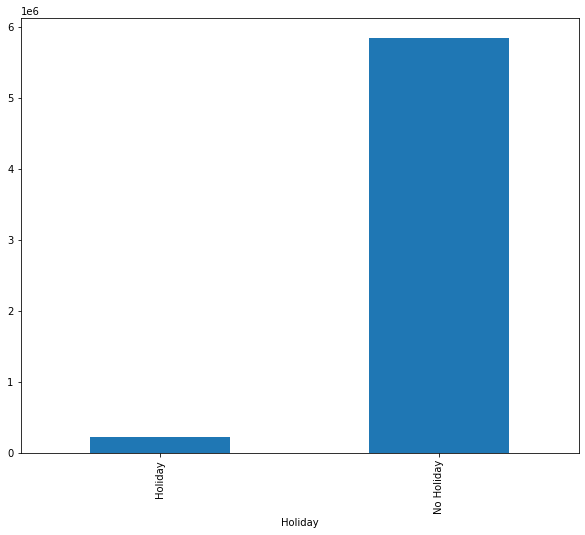

In [14]:
# Holidays VS Bike counts:
df.groupby(['Holiday'])['Rented Bike Count'].sum().plot(kind='bar',figsize=(10,8))

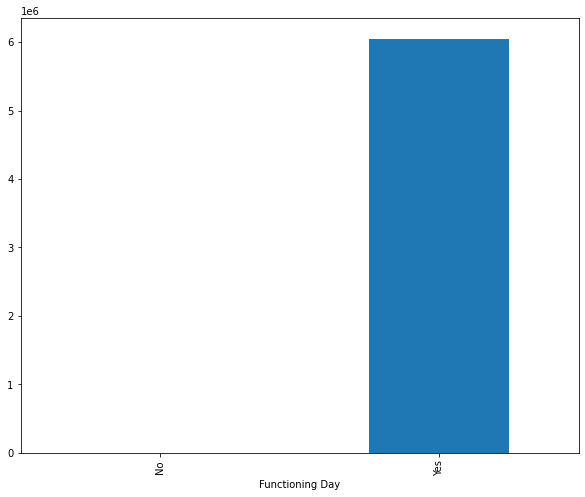

In [15]:
# Functioning Day VS Bike Counts:
df.groupby(['Functioning Day'])['Rented Bike Count'].sum().plot(kind='bar',figsize=(10,8))

Bikes are **not avilable** during Functioning Day OFF.



---


We can Extract more Information Date label.
Now we are **Adding more categorical column Week and Month**


---



In [16]:
# Adding Month and week column for more understanding of Data:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda z: datetime.strptime(z,'%d/%m/%Y'))
df['week'] = df['Date'].apply(lambda z:z.strftime("%A"))
df['month'] = df['Date'].apply(lambda z:z.strftime("%B"))

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,week,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December


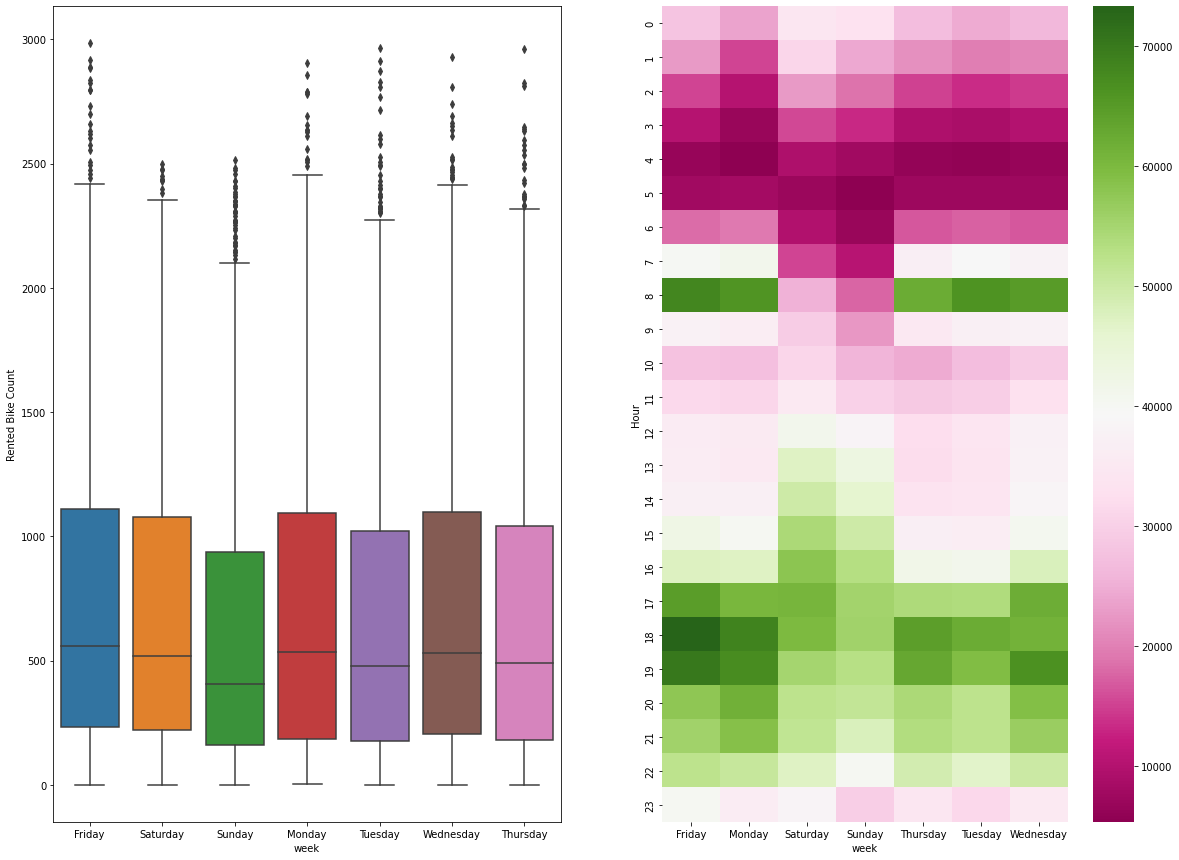

In [18]:
# Weeks VS Bikes counts VS Hours:
fig,axis = plt.subplots(1,2,figsize=(20,15))
sns.boxplot(data=df,x='week',y='Rented Bike Count',ax=axis[0])
week_day = df.groupby(['Hour','week'])['Rented Bike Count'].sum().unstack()
sns.heatmap(week_day, cmap='PiYG',ax=axis[1])

Bikes counts **decreased on Sunday & Saturday below 500**, besides in **morning and evening** bike density got **decreased**.

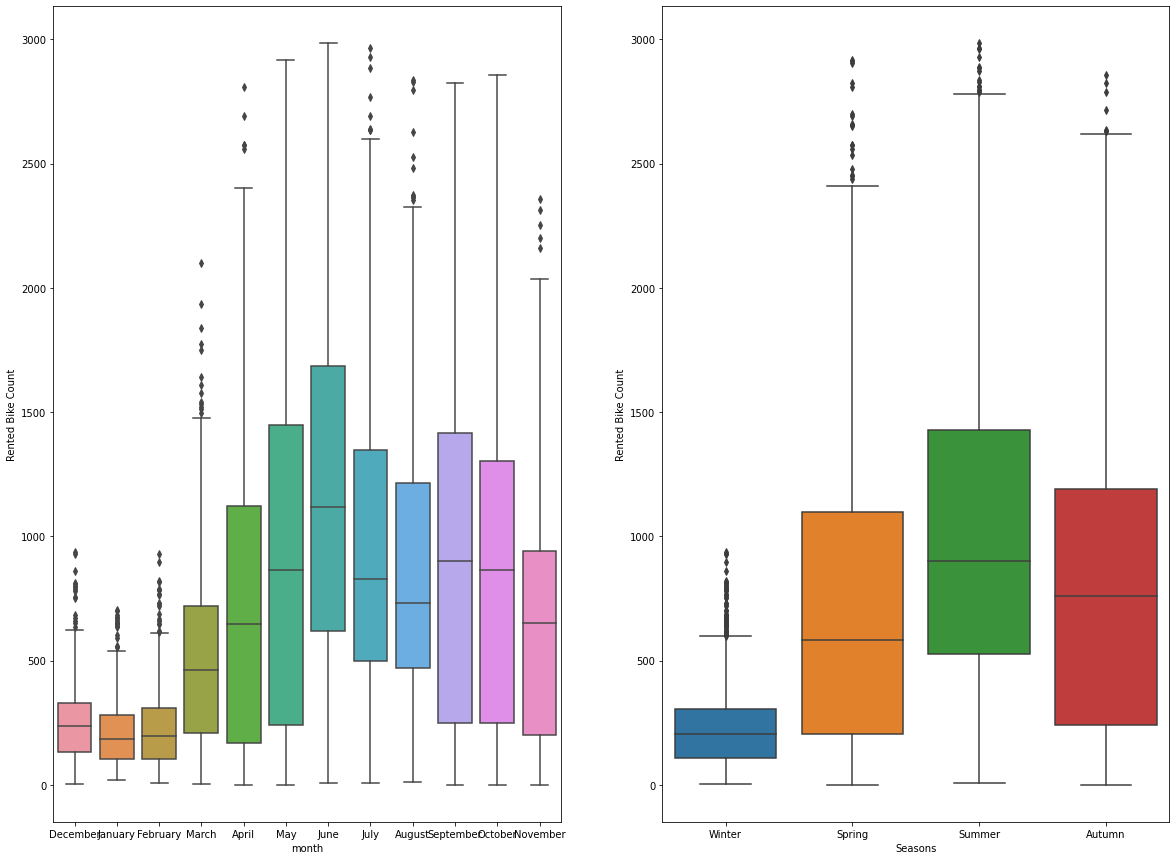

In [19]:
# Month VS Bikes counts VS Seasons
fig,axis = plt.subplots(1,2,figsize=(20,15))
sns.boxplot(data=df,x='month',y='Rented Bike Count',ax=axis[0])
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=axis[1])

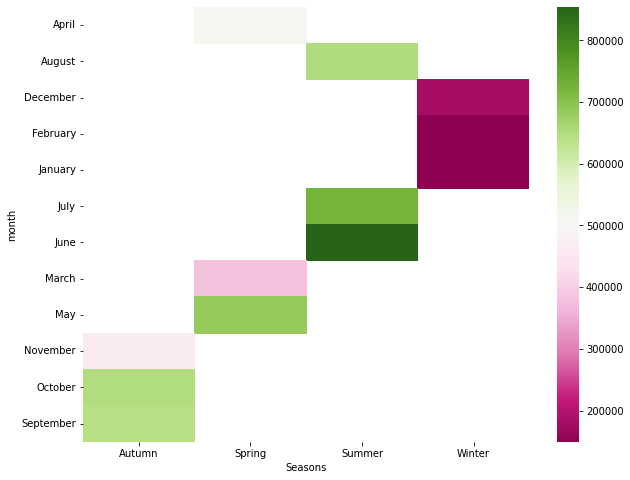

In [20]:
month_day = df.groupby(['month','Seasons'])['Rented Bike Count'].sum().unstack()
plt.figure(figsize=(10,8))
sns.heatmap(month_day, cmap='PiYG')

we conclude that:
1. Density of Bike counts **increases in Summer ( April, May, June, July)**.
2. On other hand **Decreses during winter (December, January, February, March**).
3. Public Avoid Bikes During Winters.
4. From this we conclude that month and season describe the same things so we neglect the month column.

In [21]:
df_un = df.drop_duplicates(subset=['Date'])

In [22]:
df_un.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,week,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
24,2017-12-02,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Saturday,December
48,2017-12-03,342,0,4.0,58,1.4,1296,-3.5,0.0,0.0,0.0,Winter,No Holiday,Yes,Sunday,December
72,2017-12-04,285,0,4.2,88,0.6,216,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes,Monday,December
96,2017-12-05,216,0,-6.1,42,2.6,2000,-16.9,0.0,0.0,0.0,Winter,No Holiday,Yes,Tuesday,December


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

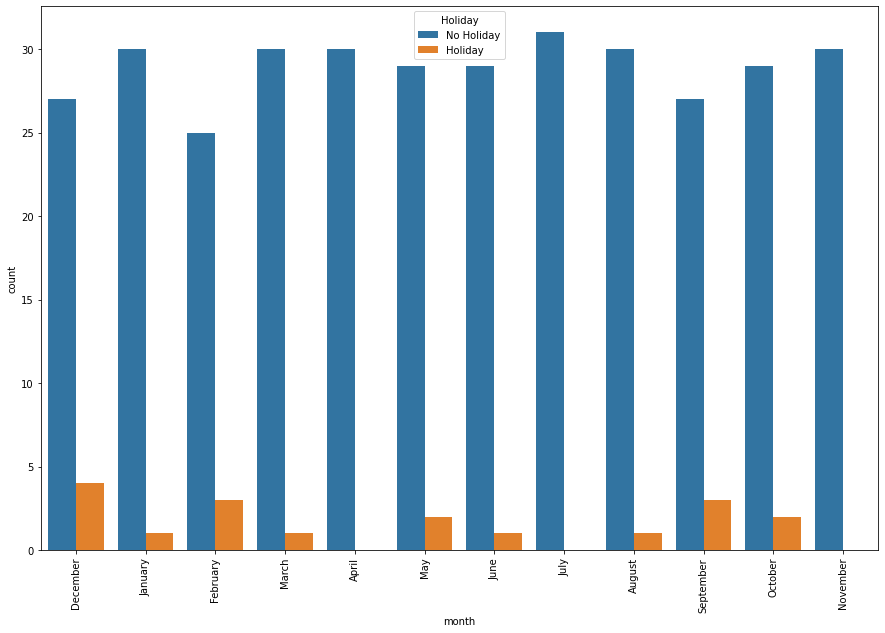

In [23]:
## Count Plot Month VS Holiday
plt.figure(figsize=(15,10))
sns.countplot(x='month',hue = 'Holiday', data=df_un)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

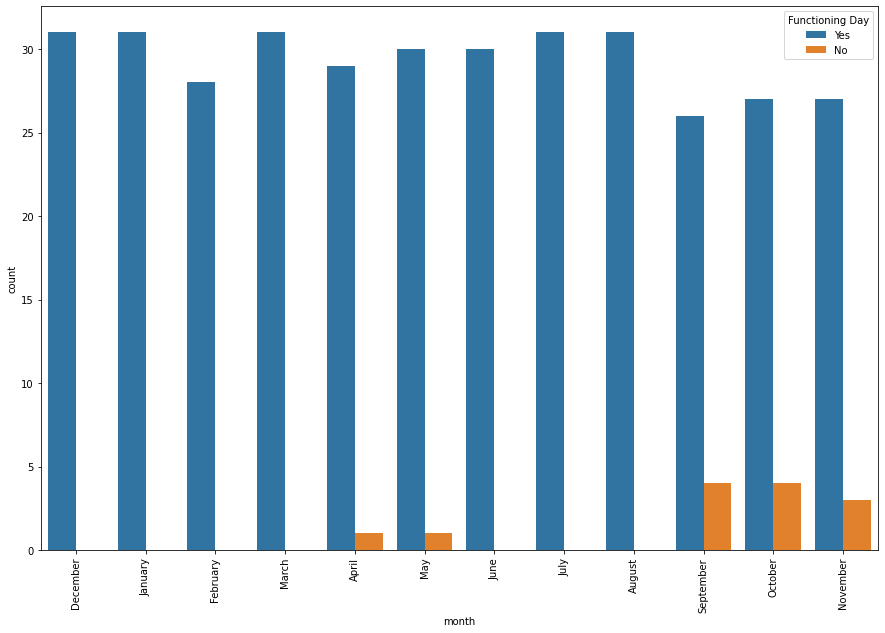

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x='month',hue = 'Functioning Day', data=df_un)
plt.xticks(rotation=90)

Seems Like **Autumn Season** Sep, Oct and Nov are majorly **OFF** as Compared to others. There is no off during winter season Dec, Jan, Feb because demand is low and during summer June, July and August because demand is high.

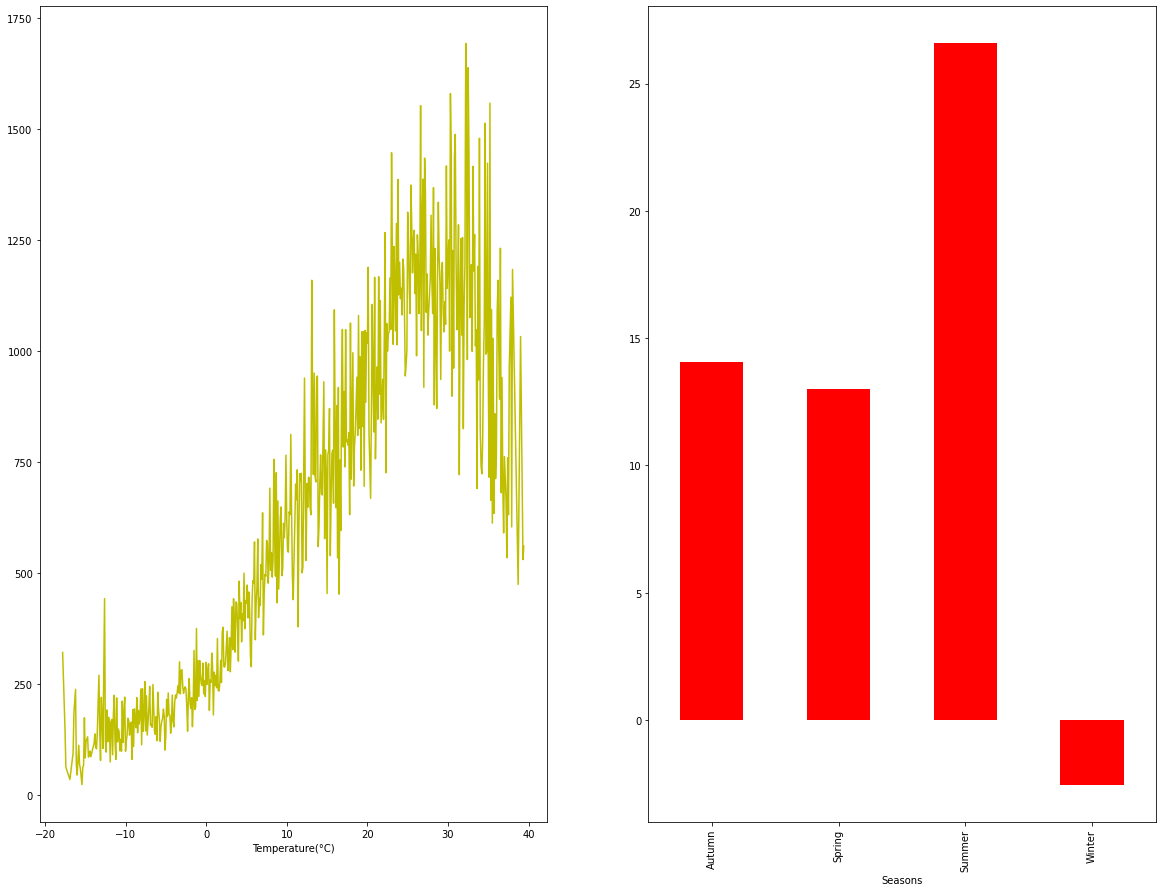

In [25]:
# Temperature VS Bike Count VS Sesons.
fig,axis = plt.subplots(1,2,figsize=(20,15))
df.groupby(['Temperature(°C)'])['Rented Bike Count'].mean().plot(color='y',ax=axis[0])
df.groupby(['Seasons'])['Temperature(°C)'].mean().plot(kind='bar', color='r',ax=axis[1])

As we seen earlier on summer seasons May,June and july bikes demand is high as compared to winters. As in temperation graph overall demand of bikes counts increases as temperature rises. After 30 degree then there is a drop in bikes counts.

**Conclusion**:
1. Bikes Count Increases rapidly as Temperature Increases till temperature ranges 20-30 DEGREE, and then decreses.
2. As we seen earlier Summer seaons have more counts and winter have less counts.
3. Conts gets decreses when temp. rises above 30 Degree.

# **FEATURE ENGINEERING**

Let's try to find and remove the multicollinearity from our dataset and also find some correlation between numerical data.

In [26]:
## Filter out numerical data:
numerical_data = list(set(df.describe().columns) - {"Hour","Dew point temperature(°C)","Snowfall (cm)","Rainfall(mm)","Humidity(%)",'day_category'})
numerical_data

['Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Wind speed (m/s)',
 'Rented Bike Count',
 'Temperature(°C)']



---


1. Removing Columns snowfall and rainfall due to highly skewed, outliers and less correlation with dependent variable.
2. Hours to be treated as categorical variable.
3. High VIF for Dew point Temperature because correlated with temperature.


---



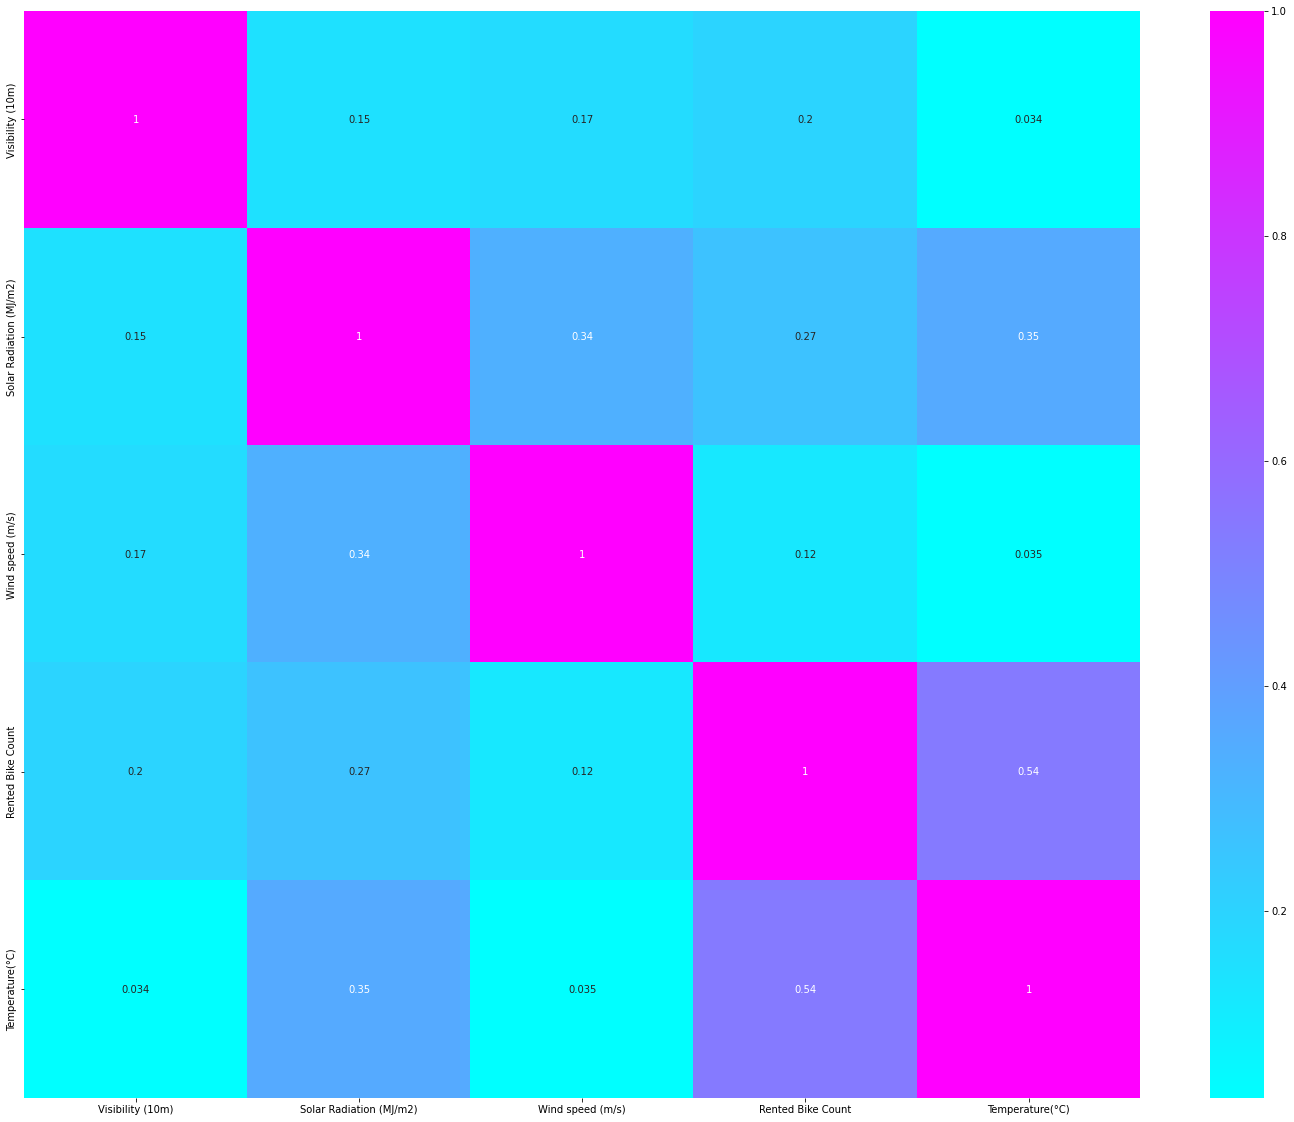

In [27]:
plt.figure(figsize=(25,20))
correlation = df[numerical_data].corr()
sns.heatmap(abs(correlation), annot=True, cmap='cool')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):
  vif=pd.DataFrame()
  vif['vaiable'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
  return vif

In [29]:
vif_cal(df[[i for i in numerical_data if i not in ['Rented Bike Count']]])

,vaiable,VIF
0,Visibility (10m),3.721922
1,Solar Radiation (MJ/m2),1.843629
2,Wind speed (m/s),3.552634
3,Temperature(°C),2.174669


We are getting VIF less than 5 that is good to perform our linear regression.

Now we do some encoding for categorical values like creating dummy variables.

In [30]:
## Encoding for Holiday
df['Holiday'] = df['Holiday'].replace(to_replace=['No Holiday','Holiday'],value=[0,1])

In [31]:
## Encoding for Functioning Day
df['Functioning Day'] = df['Functioning Day'].replace(to_replace=['Yes','No'],value=[0,1])

In [32]:
## Creating Dummies for other categorical columns:
col_to_dummies = ['Hour','week','Seasons']
df = pd.get_dummies(df, columns=col_to_dummies, drop_first=True)

In [33]:
df.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Hour_23,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2017-12-01,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2017-12-01,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2017-12-01,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2017-12-01,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# **Hypothesis Testing**
In our hypothesis testing we use OLS meathod to validate our hypothesis.

### Hypothetical Statement - 1
As our EDA we conclude that bike counts depends on temperature. As temperature increases bike count increases.
1. Null Hypothesis = Bike count doesn't depends on temperature.
2. Alternative Hypothesis = Bike counts depends on temperature.


### Hypothetical Statement - 2
As our EDA we conclude that bike counts depends on Seasons. During winters, people avoid bikes than summers
1. Null Hypothesis = Bike count doesn't depends on seasons.
2. Alternative Hypothesis = Bike counts depends on seasons.

### Hypothetical Statement - 3
As our EDA we conclude that bike counts maximize on hour 8 and 18 (office hours). During office hours bike count increases.
1. Null Hypothesis = Bike count doesn't depends on hour.
2. Alternative Hypothesis = Bike counts depends on hour.

In [34]:
## Extracting indeprndent variable which are required:
independent_var = list(set(df.describe().columns) - {'Rented Bike Count','Rainfall(mm)','Snowfall (cm)','Dew point temperature(°C)','Humidity(%)'})

In [35]:
independent_var

['Hour_3',
 'week_Monday',
 'Hour_4',
 'Hour_13',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_10',
 'Hour_2',
 'Seasons_Summer',
 'Hour_22',
 'week_Wednesday',
 'Hour_12',
 'Seasons_Winter',
 'Hour_19',
 'Hour_21',
 'Functioning Day',
 'Visibility (10m)',
 'Hour_14',
 'Hour_8',
 'week_Saturday',
 'week_Tuesday',
 'Hour_15',
 'Hour_23',
 'Hour_6',
 'Hour_1',
 'Temperature(°C)',
 'Hour_7',
 'Hour_11',
 'Seasons_Spring',
 'Hour_20',
 'week_Thursday',
 'Hour_5',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'week_Sunday',
 'Wind speed (m/s)',
 'Hour_9']

In [36]:
dependent_var = ['Rented Bike Count']

##Scaling:

In [37]:
from scipy.stats import zscore
X = df[independent_var].apply(zscore)

In [38]:
y=np.sqrt(df[dependent_var])

# **Model Implementation**

In [39]:
# Spliting the dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6085, 38)
(2609, 38)


In [40]:
#Applying Linear Redression:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [41]:
# Train score:
reg.score(X_train, y_train)

0.7067236889658212

In [42]:
# Test Score
reg.score(X_test, y_test)

0.7044761256950529



---


1. Our Model is Not Overfitting because test and train score are close.
2. OR nither underfitting having score of 70%.


---



In [43]:
reg.coef_

array([[-1.54408077, -0.55443306, -1.99013098, -0.99781481,  0.13237854,
         0.97871169,  1.87912821, -0.92687951, -1.01314394, -1.75879519,
         1.11208807, -0.19662024, -0.9618318 , -2.95340914,  1.72127074,
         1.39837605, -5.2709659 ,  1.59359923, -0.78945485,  1.45415495,
        -0.48411632, -0.30043279, -0.55200293,  0.38037931, -1.01187242,
        -0.42116827,  4.45419967,  0.18730303, -1.04461893, -1.34514402,
         1.38709841, -0.3984232 , -1.98038346,  2.91430911, -0.5241872 ,
        -1.03814015, -0.24312538,  0.01912609]])

In [44]:
reg.intercept_

array([23.25076887])

In [45]:
y_pred = reg.predict(X_test)

(0.0, 2500.0)

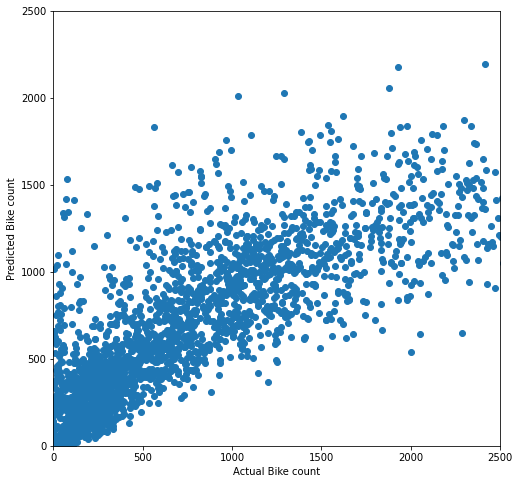

In [46]:
# Actual VS Pridicted Plotting:
plt.figure(figsize=(8,8))
plt.scatter((y_test)**2, (y_pred)**2)
plt.xlabel('Actual Bike count')
plt.ylabel('Predicted Bike count')
plt.xlim([0,2500])
plt.ylim([0,2500])

From the graph we conclude that most of the data we pridict close to the actual value.

In [47]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 136416.14172893518
RMSE : 369.34555869664274


In [48]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2,(y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6553558141137089
Adjusted R2 :  0.6502599078632502


##Analysis of Residual:

Text(0.5, 0.98, 'Residual Analysis')

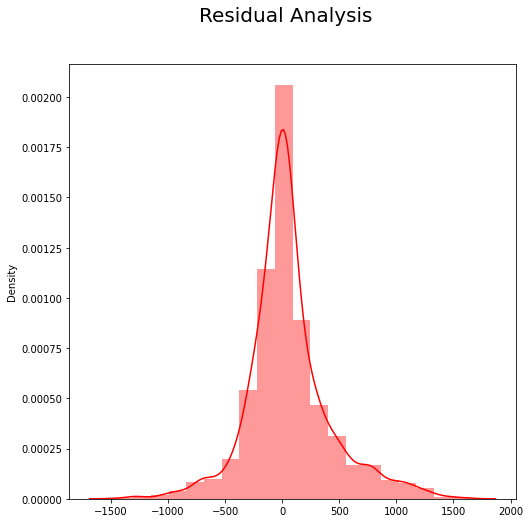

In [49]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred)**2),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

Text(0, 0.5, 'residuals')

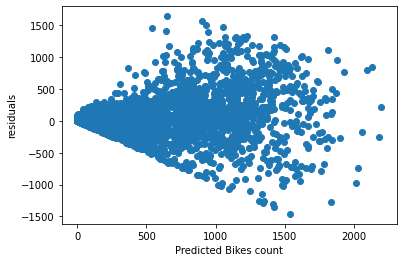

In [50]:
# Heteroscadacity
plt.scatter((y_pred)**2,(y_test)**2 - (y_pred)**2)
plt.xlabel('Predicted Bikes count')
plt.ylabel('residuals')

From the above graph we conclude that our prediction is good.

## Implementing Lasso Regression with grid search:





---



In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [53]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " neg_mean_squared_error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  neg_mean_squared_error is:  -45.356760874610345


In [54]:
y_pred_lasso = lasso_regressor.predict(X_test).reshape(-1,1)

In [55]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test)**2, (y_pred_lasso)**2)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_lasso)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 136430.0095073721
MAE : 248.60527275540753
RMSE : 369.3643316664078
R2 : 0.6553207783096694
Adjusted R2 :  0.6502243540200847


(0.0, 2500.0)

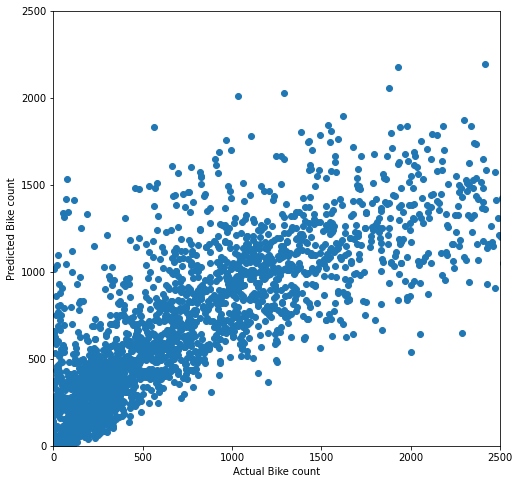

In [56]:
# Actual VS Pridicted Plotting:
plt.figure(figsize=(8,8))
plt.scatter((y_test)**2, (y_pred_lasso)**2)
plt.xlabel('Actual Bike count')
plt.ylabel('Predicted Bike count')
plt.xlim([0,2500])
plt.ylim([0,2500])

Text(0, 0.5, 'residuals')

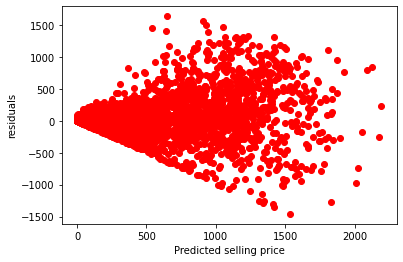

In [57]:
plt.scatter((y_pred_lasso)**2,(y_test)**2 - (y_pred_lasso)**2,c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

Text(0.5, 0.98, 'Residual Analysis')

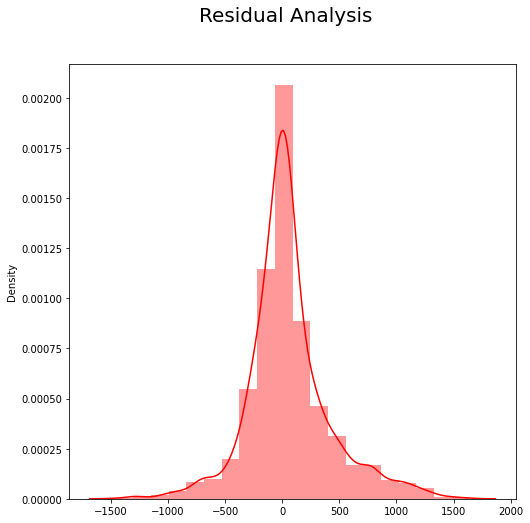

In [58]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_lasso)**2),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

## Implementing Ridge Regression with grid search:





---



In [59]:
# Hyperprarameter tuning
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -45.25710841365271


In [61]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [62]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 136557.24270358967
RMSE : 369.5365241807495
R2 : 0.6549993340819382
Adjusted R2 :  0.6498981569205038


(0.0, 2500.0)

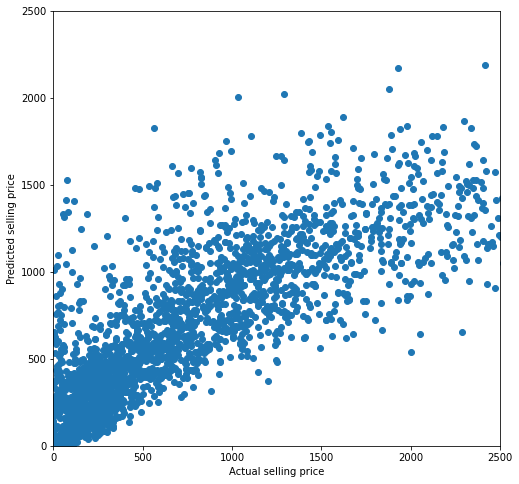

In [63]:
plt.figure(figsize=(8,8))
plt.scatter((y_test)**2, (y_pred_ridge)**2)
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')
plt.xlim([0,2500])
plt.ylim([0,2500])

Text(0, 0.5, 'residuals')

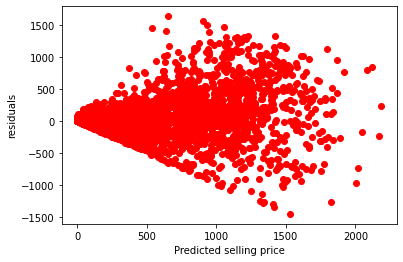

In [64]:
### Heteroscadacity
plt.scatter((y_pred_ridge)**2,(y_test)**2-(y_pred_ridge)**2,c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

Text(0.5, 0.98, 'Residual Analysis')

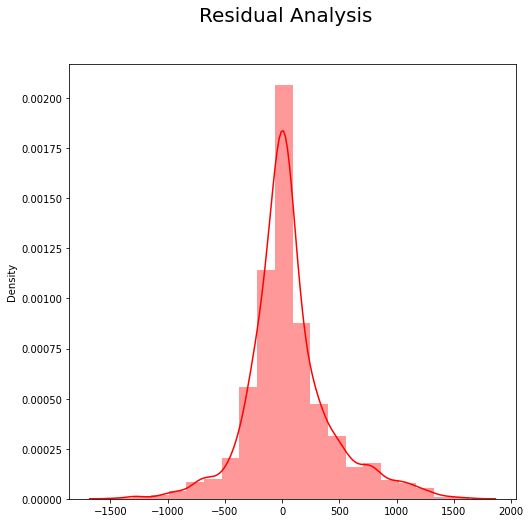

In [65]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)**2 - (y_pred_ridge)**2),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

### Validation of hypothesis Testing.

In [66]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     548.9
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        08:12:25   Log-Likelihood:                -28836.
No. Observations:                8694   AIC:                         5.775e+04
Df Residuals:                    8655   BIC:                         5.803e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      23.3305      0.072    325.348      0.000      23.190      23.471
Hour_3                     -1.5635      0.099    -15.726      0.000      -1.758      -1.369
week_Monday                -0.4861      0.094     -5.185      0.000      -0.670      -0.302
Hour_4                     -2.0230      0.099    -20.353      0.000      -2.218      -1.828
Hour_13                    -0.8979      0.115     -7.840      0.000      -1.122      -0.673
Hour_16                     0.0709      0.107      0.665      0.506      -0.138       0.280
Hour_17                     0.9704      0.103      9.431      0.000       0.769       1.172
Hour_18                     1.8538      0.099     18.808      0.000       1.661       2.047
Hour_10                    -0.9481      0.106     -8.910      0.000      -1.157      -0.740
Hour_2                     -1.0166      0.099    -10.231      0.000      -1.211      -0.822
Seasons_Summer             -1.6507      0.118    -14.032      0.000      -1.881      -1.420
Hour_22                     1.1347      0.099     11.431      0.000       0.940       1.329
week_Wednesday             -0.2052      0.094     -2.190      0.029      -0.389      -0.022
Hour_12                    -0.9161      0.114     -8.048      0.000      -1.139      -0.693
Seasons_Winter             -2.9194      0.131    -22.217      0.000      -3.177      -2.662
Hour_19                     1.6207      0.100     16.201      0.000       1.425       1.817
Hour_21                     1.3838      0.099     13.928      0.000       1.189       1.579
Functioning Day            -5.2271      0.075    -69.541      0.000      -5.374      -5.080
Visibility (10m)            1.5635      0.077     20.339      0.000       1.413       1.714
Hour_14                    -0.7928      0.113     -6.997      0.000      -1.015      -0.571
Hour_8                      1.3614      0.100     13.576      0.000       1.165       1.558
week_Saturday              -0.4050      0.094     -4.322      0.000      -0.589      -0.221
week_Tuesday               -0.1594      0.094     -1.699      0.089      -0.343       0.025
Hour_15                    -0.4519      0.110     -4.095      0.000      -0.668      -0.236
Hour_23                     0.3821      0.099      3.849      0.000       0.187       0.577
Hour_6                     -1.0487      0.100    -10.527      0.000      -1.244      -0.853
Hour_1                     -0.4422      0.099     -4.453      0.000      -0.637      -0.248
Temperature(°C)             4.4804      0.165     27.109      0.000       4.156       4.804
Hour_7                      0.2415      0.100      2.423      0.015       0.046       0.437
Hour_11                    -1.0061      0.111     -9.089      0.000      -1.223      -0.789
Seasons_Spring             -1.3006      0.094  

# **Hypothesis Testing results:**



In our both hypothesis we reject the null hypothesis:
1. For temperature our p-vale is zero which is less than our significant level 0.025.
2. For all seasons our p-vale is zero which is less than our significant level 0.025.
3. For hour our p-vale is zero which is less than our significant level 0.025. Except for hour 19 and 9.

# **Conclusion:**

1. Booking count is highly correlated with the temperature, as in summer booking counts got increases on other hand count got decreased in winters.
2. Bikes counts is correlated with hours, during office hours people more often uses bikes.
3. Seems Like Autumn Season Sep, Oct and Nov are majorly OFF as Compared to others. There is no off during winter season Dec, Jan, Feb because demand is low and during summer June, July and August because demand is high.
4. Booking got decreased on weekends.
5. R-Square and Adjusted R-square is 65 percent.
6. Regresion score for test and train are approximately same 70% , there is no overfitting and underfitting.
7. Therefore there is no improvement in lasso and ridge regression.